In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv(r'C:\Users\Sudheer\Downloads\pichiproject\py_anomaly_updated\py_anomaly\.py_anomaly\Dataset\plot_dataset.csv')

In [7]:
data.columns

Index(['EventID', 'Occurrences'], dtype='object')

In [8]:
X = data['EventID']
y = data['Occurrences']


In [9]:
X.shape, y.shape

((30,), (30,))

In [10]:

# Extract the features and target variable
X = data['EventID']
y = data['Occurrences']

# Split the data into training (85%) and testing (15%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
# Create and fit the Isolation Forest model on the training data
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train)

# Predict anomalies on the test set
y_pred = model.predict(X_test)

# Anomalies are marked as -1, and inliers are marked as 1
# You can use y_pred to identify and analyze the anomalies in your test data

# Example: Count the number of anomalies in the test set
n_anomalies = (y_pred == -1).sum()
n_total = len(X_test)
print(f"Number of anomalies in the test set: {n_anomalies}/{n_total} ({n_anomalies/n_total*100:.2f}%)")



Number of anomalies in the test set: 2/6 (33.33%)


In [12]:
y_pred

array([ 1,  1,  1, -1, -1,  1])

In [17]:
y_train.sum()

505925

In [13]:
y_test

27    14041
15        2
23        7
17       56
8       216
9         2
Name: Occurrences, dtype: int64

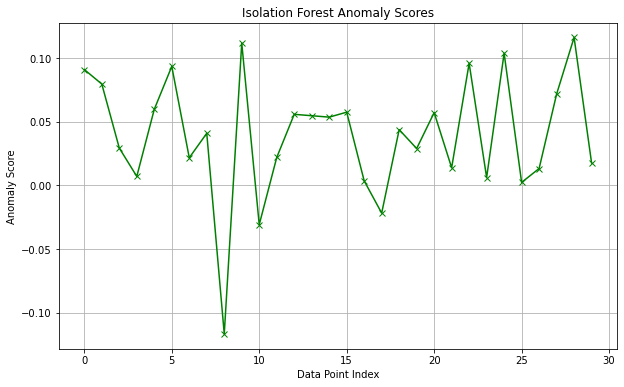

In [19]:



# Extract the features
X = data[['EventID']]  # Convert to a NumPy array
X = X['EventID'].values.reshape(-1, 1)
# Create and fit the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X)

# Get the anomaly scores for each data point
anomaly_scores = model.decision_function(X)
anomalies = data[anomaly_scores < 0]
# Create a scatter plot of anomaly scores
plt.figure(figsize=(10, 6))
plt.plot(range(len(X)), anomaly_scores, c='green', marker='x')
plt.xlabel("Data Point Index")
plt.ylabel("Anomaly Score")
plt.title("Isolation Forest Anomaly Scores")
plt.grid()
plt.show()


In [20]:
anomalies = data[anomaly_scores < 0]

In [21]:
anomalies

,EventID,Occurrences
8,96882389,216
10,321596231,14042
17,430132296,56


In [22]:
anomalies = y[anomaly_scores < 0]

In [23]:
anomalies

8       216
10    14042
17       56
Name: Occurrences, dtype: int64

In [24]:
anomalies = X[anomaly_scores < 0]

In [25]:
anomalies

array([[ 96882389],
       [321596231],
       [430132296]], dtype=int64)

In [26]:
anomalies=(y_pred == -1).sum()

In [27]:
anomalies

2

c:\Users\Sudheer\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


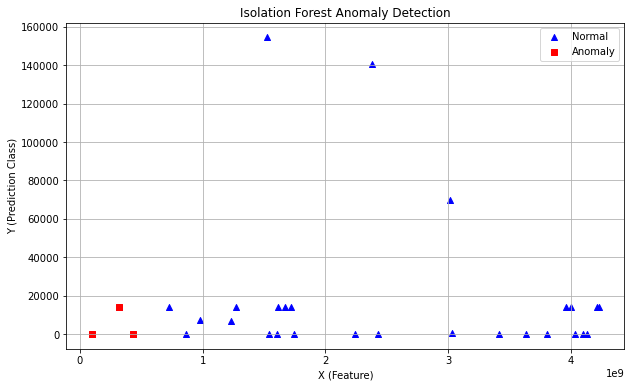

In [135]:


# Extract the feature and the prediction class
X = data[['EventID']]
y = data[['Occurrences']]

# Create and fit the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X)

# Predict anomalies using the Isolation Forest model
y_pred = model.predict(X)

# Create a scatter plot to visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X, y, marker='^', color='blue', label='Normal')
plt.scatter(X[y_pred == -1], y[y_pred == -1], marker='s', color='red', label='Anomaly')
plt.xlabel('Feature1', fontsize=15, fontweight='bold')
plt.ylabel('Feature2', fontsize=15, fontweight='bold')
plt.title("Isolation Forest Anomaly Detection")
plt.legend()
plt.grid()
plt.show()
